### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
df=pd.read_excel('SVM_Data.xlsx')
df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


### Data Understanding

In [3]:
df.shape

(50, 3)

In [4]:
df.dtypes

X1    float64
X2    float64
Y       int64
dtype: object

In [5]:
df.isna().sum()

X1    0
X2    0
Y     0
dtype: int64

### Model Building

In [6]:
X=df.loc[:,['X1','X2']].values
y=df.loc[:,'Y'].values

In [7]:
from sklearn.preprocessing import StandardScaler
scaled_X=StandardScaler()
scaled_X=scaled_X.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.25,random_state=0)

### Model Training

In [9]:
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear')

### Model Testing || Model Evaluation

### Linear Classification

In [10]:
y_pred_svc_linear=svc_classifier.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred_svc_linear)

0.6153846153846154

In [12]:
confusion_matrix(y_test,y_pred_svc_linear)

array([[2, 5],
       [0, 6]], dtype=int64)

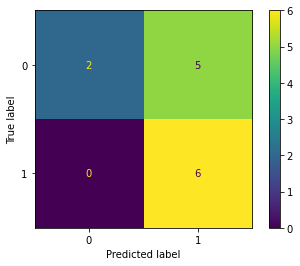

In [13]:
plot_confusion_matrix(estimator=svc_classifier,X=X_test,y_true=y_test,cmap='viridis')
plt.show()

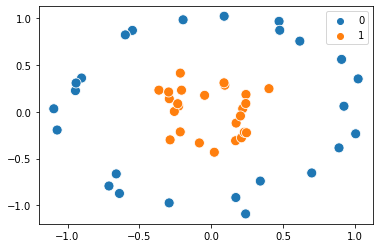

In [14]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,s=100)
plt.show()

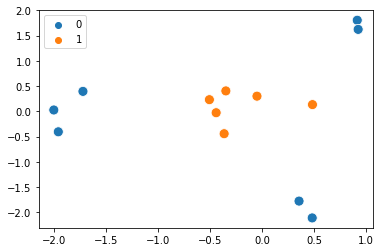

In [15]:
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,s=100)
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
zero_one_colourmap = ListedColormap(('red', 'green'))

In [18]:
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                    stop = X_set[:, 0].max() + 1, 
                                     step = 0.01),
                           np.arange(start = X_set[:, 1].min() - 1, 
                                     stop = X_set[:, 1].max() + 1, 
                                     step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                 X2.ravel()]).T).reshape(X1.shape),
                   alpha = 0.75, 
                   cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = (zero_one_colourmap)(i), label = j)
        plt.title('SVM Decision Boundary')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
    return plt.show()

In [19]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


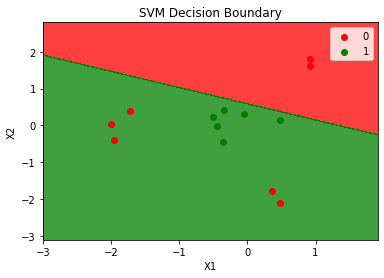

In [20]:
plot_decision_boundary(X_test, y_test, svc_classifier)

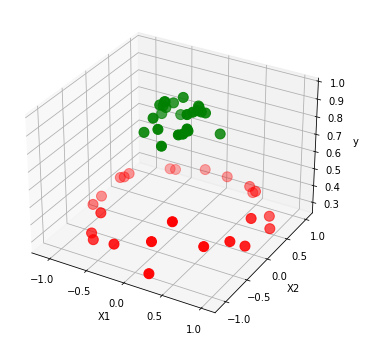

In [21]:
plt.figure(figsize=(6,6))
plot_3d_plot(X,y)
plt.show()

### Non Linear Classifier

In [22]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)

SVC()

In [23]:
y_pred_rbf_classifier=rbf_classifier.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred_rbf_classifier)

1.0

In [25]:
confusion_matrix(y_test,y_pred_rbf_classifier)

array([[7, 0],
       [0, 6]], dtype=int64)

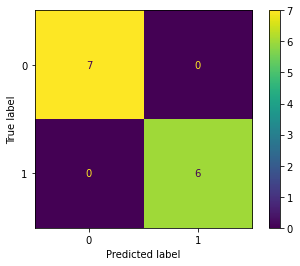

In [26]:
plot_confusion_matrix(estimator=rbf_classifier,X=X_test,y_true=y_test,cmap='viridis')
plt.show()

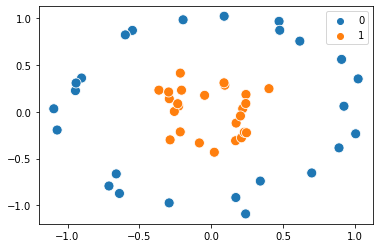

In [27]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,s=100)
plt.show()

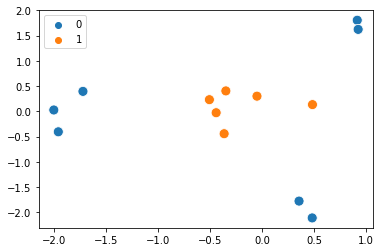

In [28]:
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,s=100)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


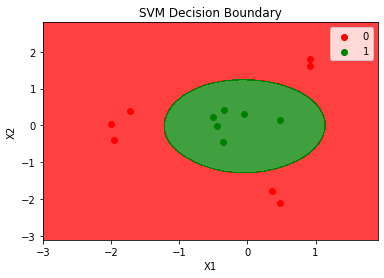

In [29]:
plot_decision_boundary(X_test, y_test, rbf_classifier)

### End !!!